# Домашнее задание 5. Градиентный спуск. (10 баллов + 2.5 бонус)

В этом домашнем задании вы напишете градиентный спуск для линейной регрессии, а так же посмотрите, как он ведёт себя с разными параметрами и разными функциями потерь.

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

In [ ]:
from typing import Iterable, List

import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split


## Часть 1. Градиентный спуск (5 баллов)

Для начала давайте вспомним самый простой функционал ошибки, который мы применяем в задаче регрессии — Mean Squared Error:

$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2
$$

где $x_i$ — это $i$-ый объект датасета, $y_i$ — правильный ответ для $i$-го объекта, а $w$ — веса нашей линейной модели.

Как мы помним, для линейной модели, его можно записать в матричном виде вот так:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2
$$

где $X$ — это матрица объекты-признаки, а $y$ — вектор правильных ответов

Для того чтобы воспользоваться методом градиентного спуска, нам нужно посчитать градиент нашего функционала. Для MSE он будет выглядеть так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y)
$$

Ниже приведён базовый класс `BaseLoss`, который мы будем использовать для реализации всех наших лоссов. Менять его не нужно. У него есть два абстрактных метода:
1. Метод `calc_loss`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения лосса
2. Метод `calc_grad`, который будет принимать на вход объекты `x`, правильные ответы `y` и веса `w` и вычислять значения градиента (вектор)

In [ ]:
import abc


class BaseLoss(abc.ABC):
    """Базовый класс лосса"""

    @abc.abstractmethod
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        raise NotImplementedError

    @abc.abstractmethod
    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        raise NotImplementedError

Теперь давайте напишем реализацию этого абстрактоного класса: Mean Squared Error лосс.

**Задание 1.1 (5/8 балла):** Реализуйте класс `MSELoss`

Он должен вычислять лосс и градиент по формулам наверху

In [ ]:
class MSELoss(BaseLoss):
    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: число -- значения функции потерь
        """
        prediction = X.dot(w)
        diff = (prediction - y) ** 2
        return diff.mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :return: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        factor = X.dot(w) - y
        return 2 * ((X.T).dot(factor)) / len(X)


Теперь мы можем создать объект `MSELoss` и при помощи него вычислять значение нашей функции потерь и градиенты:

In [ ]:
# Создадим объект лосса
loss = MSELoss()

# Создадим какой-то датасет
X = np.arange(200).reshape(20, 10)
y = np.arange(20)

# Создадим какой-то вектор весов
w = np.arange(10)

# Выведем значение лосса и градиента на этом датасете с этим вектором весов
print(loss.calc_loss(X, y, w))
print(loss.calc_grad(X, y, w))

# Проверка, что методы реализованы правильно
assert loss.calc_loss(X, y, w) == 27410283.5, "Метод calc_loss реализован неверно"
assert np.allclose(
    loss.calc_grad(X, y, w),
    np.array(
        [
            1163180.0,
            1172281.0,
            1181382.0,
            1190483.0,
            1199584.0,
            1208685.0,
            1217786.0,
            1226887.0,
            1235988.0,
            1245089.0,
        ]
    ),
), "Метод calc_grad реализован неверно"
print("Всё верно!")

27410283.5
[1163180. 1172281. 1181382. 1190483. 1199584. 1208685. 1217786. 1226887.
 1235988. 1245089.]
Всё верно!


Теперь когда у нас есть всё для вычисления градиента, давайте напишем наш градиентный спуск. Напомним, что формула для одной итерации градиентного спуска выглядит следующим образом:

$$
w^t = w^{t-1} - \eta \nabla_{w} Q(w^{t-1}, X, y)
$$

Где $w^t$ — значение вектора весов на $t$-ой итерации, а $\eta$ — параметр learning rate, отвечающий за размер шага.

**Задание 1.2 (5/8 балла):** Реализуйте функцию `gradient_descent`

Функция должна принимать на вход начальное значение весов линейной модели `w_init`, матрицу объектов-признаков `X`,
вектор правильных ответов `y`, объект функции потерь `loss`, размер шага `lr` и количество итераций `n_iterations`.

Функция должна реализовывать цикл, в котором происходит шаг градиентного спуска (градиенты берутся из `loss` посредством вызова метода `calc_grad`) по формуле выше и возвращать
траекторию спуска (список из новых значений весов на каждом шаге)

In [ ]:
def gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    n_iterations: int = 100000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    way = list()
    way.append(w_init)
    for i in range(n_iterations):
      w_init = w_init - lr*loss.calc_grad(X, y, w_init)
      if any(np.isnan(i) or np.isinf(i) for i in w_init):
        continue
      way.append(w_init)
    return way


Теперь создадим синтетический датасет и функцию, которая будет рисовать траекторию градиентного спуска по истории:

In [ ]:
# Создаём датасет из двух переменных и реального вектора зависимости w_true

np.random.seed(1337)

n_features = 2
n_objects = 300
batch_size = 10
num_steps = 43

w_true = np.random.normal(size=(n_features,))

X = np.random.uniform(-5, 5, (n_objects, n_features))
X *= (np.arange(n_features) * 2 + 1)[np.newaxis, :]
y = X.dot(w_true) + np.random.normal(0, 1, (n_objects))
w_init = np.random.uniform(-2, 2, (n_features))

print(X.shape)
print(y.shape)

(300, 2)
(300,)


In [ ]:
loss = MSELoss()
w_list = gradient_descent(w_init, X, y, loss, 0.01, 100)
print(loss.calc_loss(X, y, w_list[0]))
print(loss.calc_loss(X, y, w_list[-1]))

425.58917680450253
0.8670644395649493


Немного изменим сигнатуру метода, чтобы именовать графики

In [ ]:
def plot_gd(w_list: Iterable, X: np.ndarray, y: np.ndarray, loss: BaseLoss, lr: float, subplot, batch = -1, p = -1):
    """
    Функция для отрисовки траектории градиентного спуска
    :param w_list: Список из объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать лосс при помощи loss.calc_loss(X, y, w)
    """
    w_list = np.array(w_list)
    meshgrid_space = np.linspace(-2, 2, 100)
    A, B = np.meshgrid(meshgrid_space, meshgrid_space)

    levels = np.empty_like(A)
    for i in range(A.shape[0]):
        for j in range(A.shape[1]):
            w_tmp = np.array([A[i, j], B[i, j]])
            levels[i, j] = loss.calc_loss(X, y, w_tmp)

    plt.subplot(subplot)
    if p == -1:
      if batch == -1:
          plt.title(f"GD trajectory for {lr}")
      else:
        plt.title(f"GD trajectory for {lr} with batch size = {batch}")
    else:
      plt.title(f"GD trajectory for p = {p}")
    plt.xlabel(r"$w_1$")
    plt.ylabel(r"$w_2$")
    plt.xlim(w_list[:, 0].min() - 0.1, w_list[:, 0].max() + 0.1)
    plt.ylim(w_list[:, 1].min() - 0.1, w_list[:, 1].max() + 0.1)
    plt.gca().set_aspect("equal")

    # visualize the level set
    CS = plt.contour(
        A, B, levels, levels=np.logspace(0, 1, num=20), cmap=plt.cm.rainbow_r
    )
    CB = plt.colorbar(CS, shrink=0.8, extend="both")

    # visualize trajectory
    plt.scatter(w_list[:, 0], w_list[:, 1])
    plt.plot(w_list[:, 0], w_list[:, 1])

**Задание 1.3 (5/8 балла):** При помощи функций `gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`). Используйте не менее четырёх разных значений для `lr`.

Сделайте и опишите свои выводы о том, как параметр `lr` влияет на поведение градиентного спуска

Подсказки:
* Функция `gradient_descent` возвращает историю весов, которую нужно подать в функцию `plot_gd`
* Хорошие значения для `lr` могут лежать в промежутке от 0.0001 до 0.1

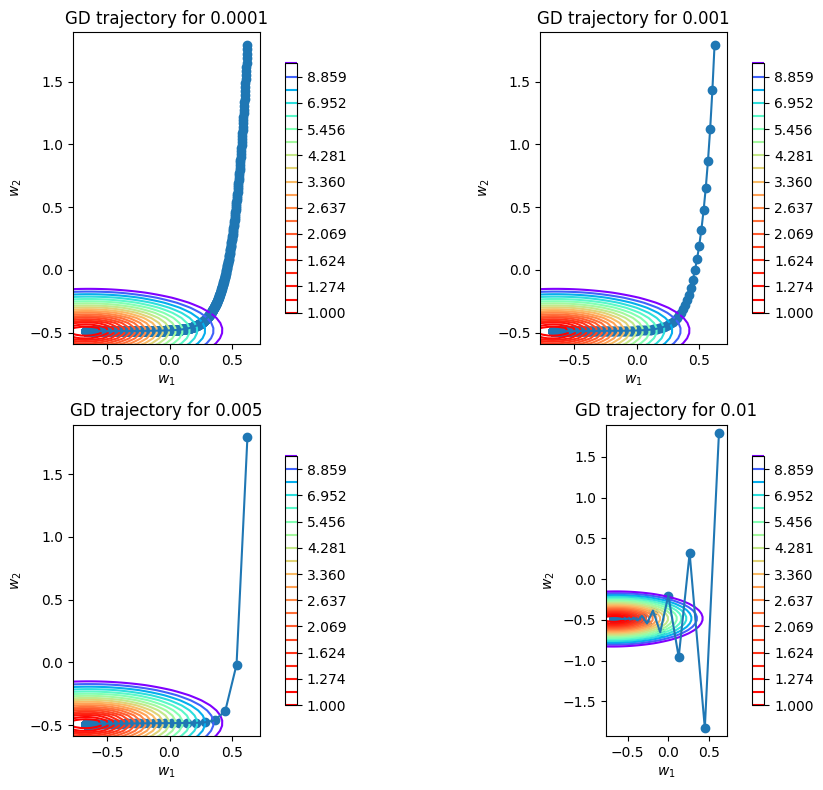

In [ ]:
lr_list = np.array([0.0001, 0.001, 0.005, 0.01])
plt.figure(figsize=(10, 8))
for i in range(len(lr_list)):
  w_list = gradient_descent(w_init, X, y, loss, lr_list[i])
  plot_gd(w_list, X, y, loss, lr_list[i], int(f'22{i+1}'))
plt.tight_layout()
plt.show()

Параметр lr (длина шага) определяет некоторую точность движения к минимуму. Чем больше длина шага, тем сильнее значения градиента может "бросать" из стороны в сторону. При слишком большой длине шага есть вероятность пропустить минимум, а при слишком маленькой - что спуск будет происходит слишком долго или даже разойтись.

Теперь реализуем стохастический градиентный спуск

**Задание 1.4 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent`

Функция должна принимать все те же параметры, что и функция `gradient_descent`, но ещё параметр `batch_size`, отвечающий за размер батча.

Функция должна как и раньше реализовывать цикл, в котором происходит шаг градиентного спуска, но на каждом шаге считать градиент не по всей выборке `X`, а только по случайно выбранной части.

Подсказка: для выбора случайной части можно использовать [`np.random.choice`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html) с правильным параметром `size`, чтобы выбрать случайные индексы, а потом проиндексировать получившимся массивом массив `X`:
```
batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
batch = X[batch_indices]
```

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    way = list()
    way.append(w_init)
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch_X = X[batch_indices]
      batch_y = y[batch_indices]
      w_init = w_init - lr*loss.calc_grad(batch_X, batch_y, w_init)
      if any(np.isnan(i) or np.isinf(i) for i in w_init):
        continue
      way.append(w_init)
    return way

**Задание 1.5 (5/8 балла):** При помощи функций `stochastic_gradient_descent` и  `plot_gd` нарисуйте траекторию градиентного спуска для разных значений длины шага (параметра `lr`) и размера подвыборки (параметра `batch_size`). Используйте не менее четырёх разных значений для `lr` и `batch_size`.

Сделайте и опишите свои выводы о том, как параметры  `lr` и `batch_size` влияют на поведение стохастического градиентного спуска. Как отличается поведение стохастического градиентного спуска от обычного?

Обратите внимание, что в нашем датасете всего 300 объектов, так что `batch_size` больше этого числа не будет иметь смысла.

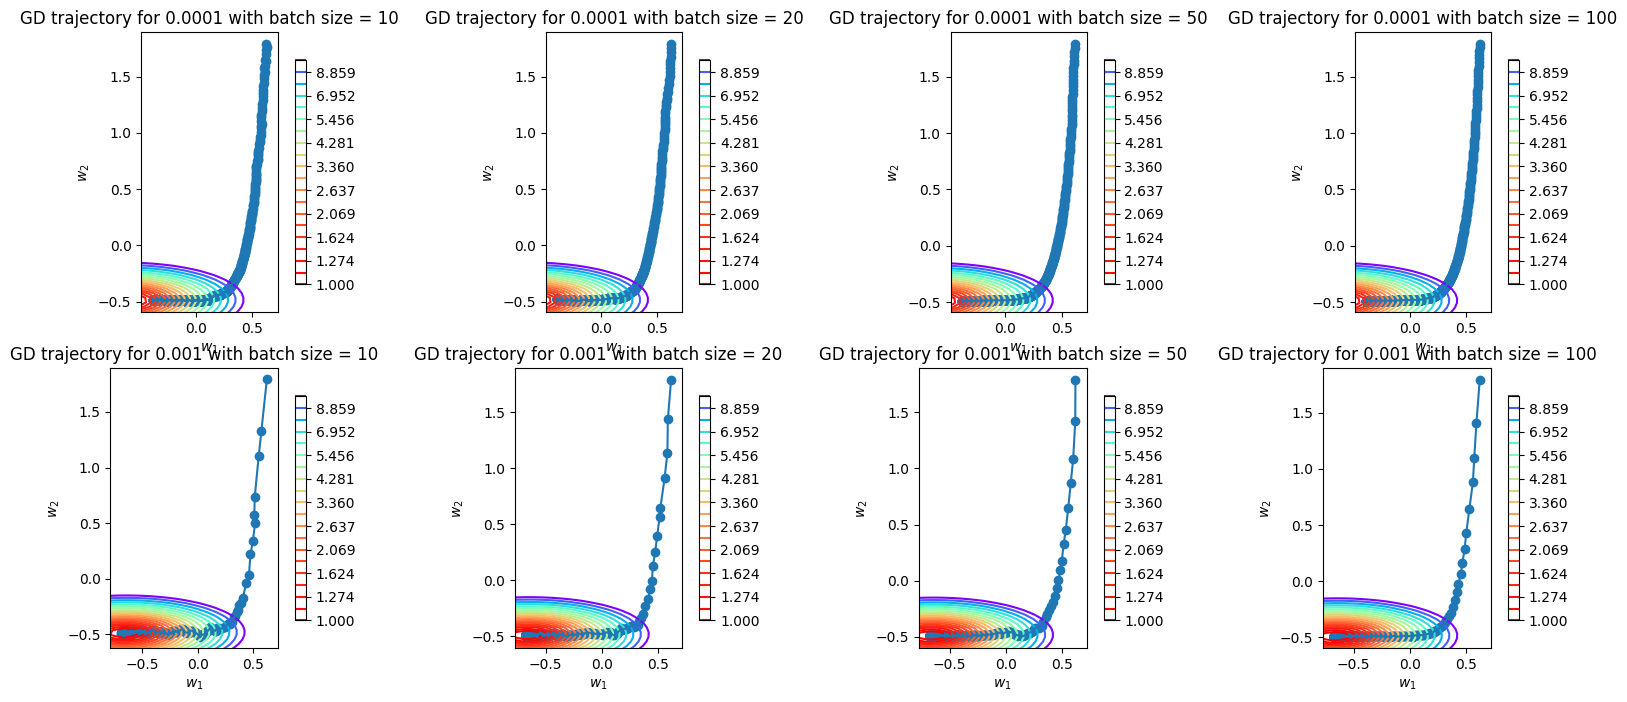

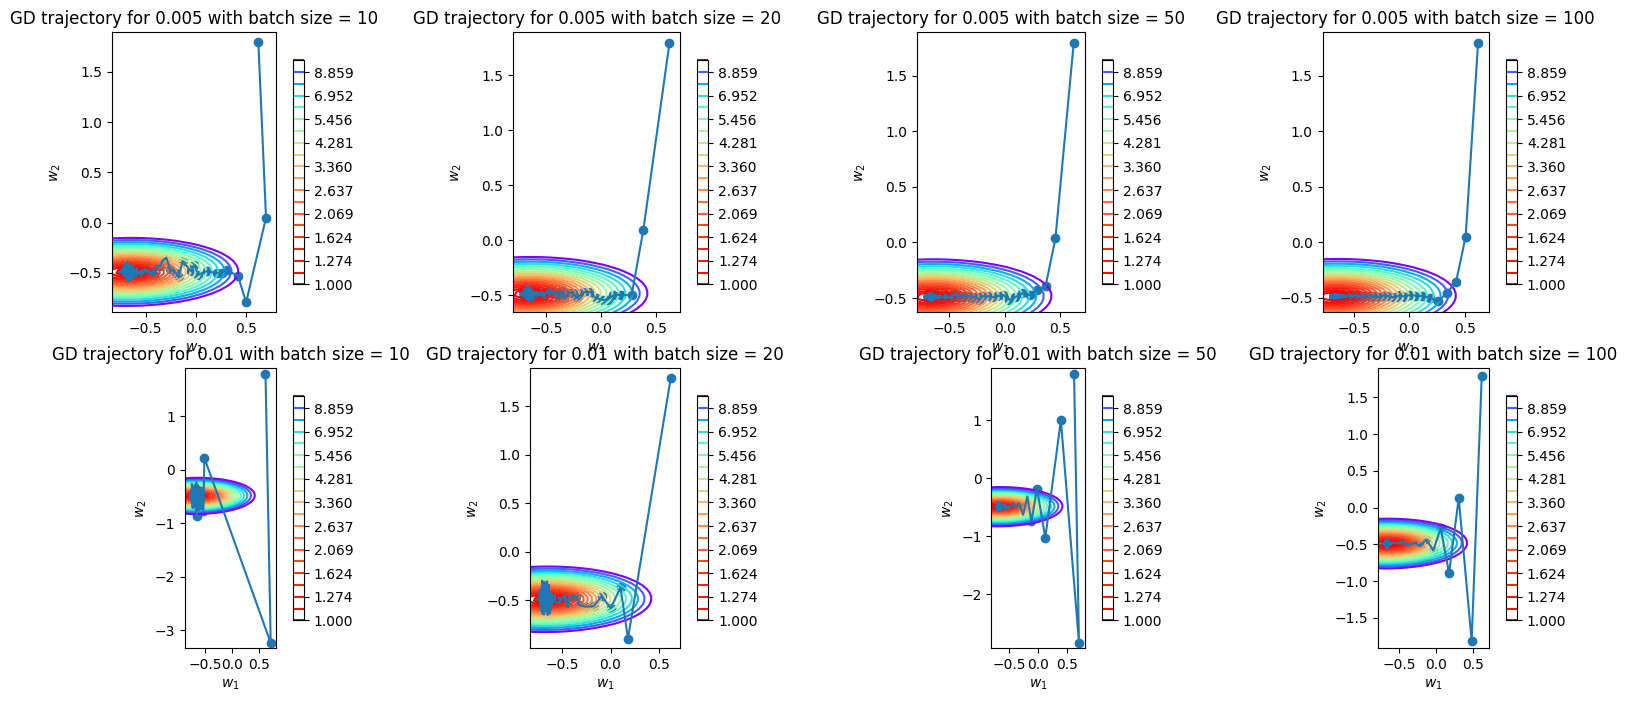

In [ ]:
lr_list = np.array([0.0001, 0.001, 0.005, 0.01])
batch_list = np.array([10, 20, 50, 100])
count = 1
plt.figure(figsize=(20, 8))
for i in range(len(lr_list) // 2):
  for j in range(len(batch_list)):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr_list[i], batch_list[j])
    plot_gd(w_list, X, y, loss, lr_list[i], int(f"24{count}"), batch_list[j])
    count += 1
count = 1
plt.figure(figsize=(20, 8))
for i in range(2, len(lr_list)):
  for j in range(len(batch_list)):
    w_list = stochastic_gradient_descent(w_init, X, y, loss, lr_list[i], batch_list[j])
    plot_gd(w_list, X, y, loss, lr_list[i], int(f"24{count}"), batch_list[j])
    count += 1

Поведение стохастического градиентного спуска более хаотичное, значения коэффициентов при относительно большой длине шага и малом значении батча могут изменяться хаотично и не всегда в верном направлении. При довольно большом размере батча (например, более 20% объема выборки) и оптимальной длине шага стохастический градиентный спуск показывает довольно точные результаты.

Таким образом, наиболее правильные результаты получаются при бОльшем размере батча. Длина шага влияет на спуск так же, как и в предыдущем пукнте.

Вы могли заметить, что поведение градиентного спуска, особенно стохастической версии, очень сильно зависит от размера шага.

Как правило, в начале спуска мы хотим делать большие шаги, чтобы поскорее подойти поближе к минимуму, а позже мы уже хотим делать шаги маленькие, чтобы более точнее этого минимума достичь и не "перепрыгнуть" его.

Чтобы достичь такого поведения мы можем постепенно уменьшать длину шага с увеличением номера итерации. Сделать это можно, например, вычисляя на каждой итерации длину шага по следующей формуле:

$$
    \eta_t
    =
    \lambda
    \left(
        \frac{s_0}{s_0 + t}
    \right)^p
$$

где $\eta_t$ — длина шага на итерации $t$, $\lambda$ — начальная длина шага (параметр `lr` у нас), $s_0$ и $p$ — настраиваемые параметры.

**Задание 1.6 (5/8 балла):** Реализуйте функцию `stochastic_gradient_descent` на этот раз с затухающим шагом по формуле выше. Параметр $s_0$ возьмите равным 1. Параметр $p$ возьмите из нового аргумента функции `p`.

In [ ]:
def stochastic_gradient_descent(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    lr: float,
    batch_size: int,
    p: float,
    n_iterations: int = 1000,
) -> List[np.ndarray]:
    """
    Функция градиентного спуска
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param lr: float -- параметр величины шага, на который нужно домножать градиент
    :param batch_size: int -- размер подвыборки, которую нужно семплировать на каждом шаге
    :param p: float -- значение степени в формуле затухания длины шага
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    way = list()
    way.append(w_init)
    for i in range(n_iterations):
      batch_indices = np.random.choice(X.shape[0], size=batch_size, replace=False)
      batch_X = X[batch_indices]
      batch_y = y[batch_indices]
      step = lr * (1 / (1 + i)) ** p
      w_init = w_init - step*loss.calc_grad(batch_X, batch_y, w_init)
      if any(np.isnan(i) or np.isinf(i) for i in w_init):
        continue
      way.append(w_init)
    return way

**Задание 1.7 (5/8 балла):** При помощи новой функции `stochastic_gradient_descent` и функции `plot_gd` нарисуйте траекторию градиентного спуска для разных значений параметра `p`. Используйте не менее четырёх разных значений для `p`. Хорошими могут быть значения, лежащие в промежутке от 0.1 до 1.
Параметр `lr` возьмите равным 0.01, а параметр `batch_size` равным 10.

Сделайте и опишите свои выводы о том, как параметр `p` влияет на поведение стохастического градиентного спуска

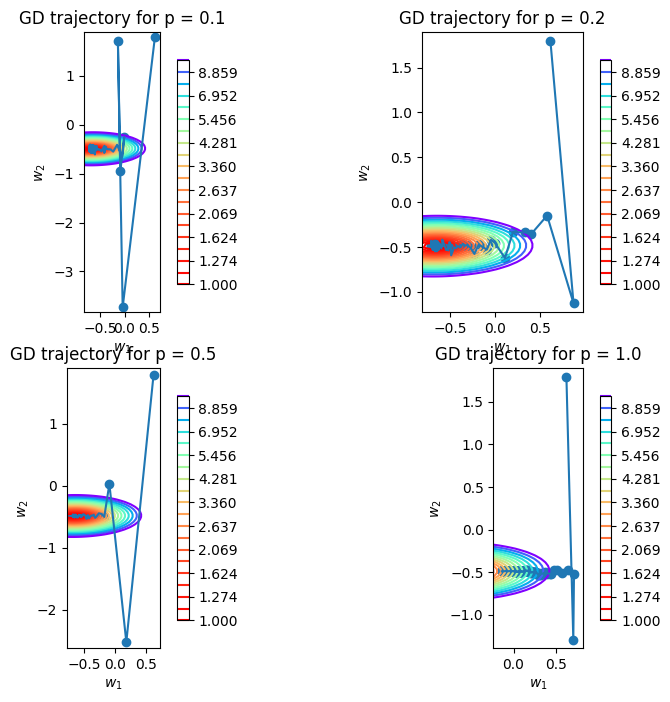

In [ ]:
p_list = np.array([0.1, 0.2, 0.5, 1])
plt.figure(figsize=(10, 8))
count = 1
for i in p_list:
    w_list = stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, i)
    plot_gd(w_list, X, y, loss, 0.01, int(f"22{count}"), 10, i)
    count += 1

p = 1 делает стохастический спуск менее резким и более точным, при этом малые значения р делают его еще более непредсказуемым, чем обычный стохастический спуск.

**Задание 1.8 (5/8 балла):** Сравните сходимость обычного градиентного спуска и стохастичекой версии:
Нарисуйте график зависимости значения лосса (его можно посчитать при помощи метода `calc_loss`, используя $x$ и $y$ из датасета и $w$ с соответствующей итерации) от номера итерации для траекторий, полученных при помощи обычного и стохастического градиентного спуска с одинаковыми параметрами. Параметр `batch_size` возьмите равным 10.

Видно ли на данном графике преимущество SGD? Почему?

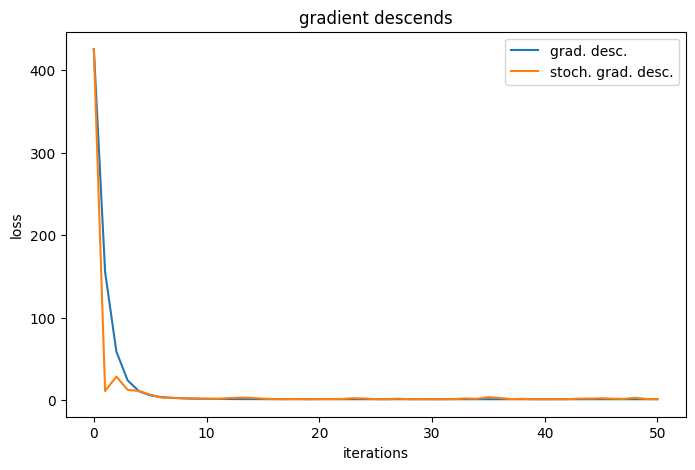

In [ ]:
# Обычный град. спуск
loss_gd = [loss.calc_loss(X, y, i) for i in gradient_descent(w_init, X, y, loss, 0.01, 50)]
# Стохаст. град. спуск
loss_sgd = [loss.calc_loss(X, y, i) for i in stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.001, 50)]
# print(loss_gd)
# print(loss_sgd)
x = np.arange(0, 51, 1)
plt.figure(figsize=(8, 5))
plt.plot(x, loss_gd, label='grad. desc.')
plt.plot(x, loss_sgd, label='stoch. grad. desc.')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('gradient descends')
plt.legend(loc='best')
plt.show()

Попробуем малое число итераций. SGD в самом начале сильно отклоняется от реальных весов (большая ошибка), но затем сходится к верным весам примерно так же быстро, как и обычный GD, даже немного быстрее. При этом экономится время на вычисления градиента на всей выборке, что может значительно ускорить процесс на выборках большого объема.

Посмотрим на большое число итераций:

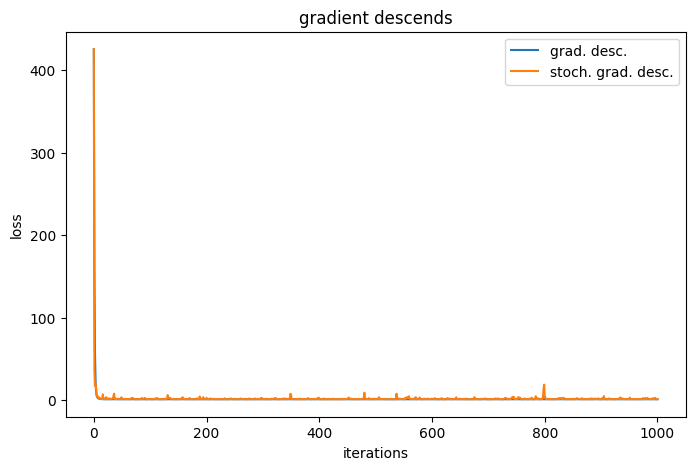

In [ ]:
# Обычный град. спуск
loss_gd = [loss.calc_loss(X, y, i) for i in gradient_descent(w_init, X, y, loss, 0.01, 1000)]
# Стохаст. град. спуск
loss_sgd = [loss.calc_loss(X, y, i) for i in stochastic_gradient_descent(w_init, X, y, loss, 0.01, 10, 0.001, 1000)]
# print(loss_gd)
# print(loss_sgd)
x = np.arange(0, 1001, 1)
plt.figure(figsize=(8, 5))
plt.plot(x, loss_gd, label='grad. desc.')
plt.plot(x, loss_sgd, label='stoch. grad. desc.')
plt.xlabel('iterations')
plt.ylabel('loss')
plt.title('gradient descends')
plt.legend(loc='best')
plt.show()

Видно, что оба спуска работают хорошо (даже несмотря на колебания SGD при iter > 150)

## Часть 2. Линейная регрессия (5 баллов)

Теперь давайте напишем наш класс для линейной регрессии. Он будет использовать интерфейс, знакомый нам из библиотеки `sklearn`.

В методе `fit` мы будем подбирать веса `w` при помощи градиентного спуска нашим методом `gradient_descent`

В методе `predict` мы будем применять нашу регрессию к датасету,

**Задание 2.1 (5/8 балла):** Допишите код в методах `fit` и `predict` класса `LinearRegression`

В методе `fit` вам нужно как-то инициализировать веса `w`, применить `gradient_descent` и сохранить последнюю `w` из траектории.

В методе `predict` вам нужно применить линейную регрессию и вернуть вектор ответов.

Обратите внимание, что объект лосса передаётся в момент инициализации и хранится в `self.loss`. Его нужно использовать в `fit` для `gradient_descent`.

In [229]:
class LinearRegression:
    def __init__(self, loss: BaseLoss, lr: float = 0.1) -> None:
        self.loss = loss
        self.lr = lr

    def fit(self, X: np.ndarray, y: np.ndarray) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.arange(X.shape[1])
        self.weights = gradient_descent(w_init, X, y, self.loss, self.lr)[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "weights"), "Linear regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        # result = np.array([])
        # for element in X:
        #   result = np.append(result, element.dot(self.weights))
        return X.dot(self.weights)


Теперь у нас есть наш класс линейной регрессии. Более того, мы можем управлять тем, какую функцию потерь мы оптимизируем, просто передавая разные классы в параметр `loss` при инициализации.

Пока у нас нет никаких классов кроме `MSELoss`, но скоро они появятся.

Для `MSELoss` мы бы создавали наш объект линейной регрессии, например, так:

In [230]:
linear_regression = LinearRegression(MSELoss())

Применим нашу регрессию на реальном датасете. Загрузим датасет с машинами, который был у вас на семинарах:

In [296]:
import pandas as pd

X_raw = pd.read_csv(
    "http://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data",
    header=None,
    na_values=["?"],
)
X_raw.head()
X_raw = X_raw[~X_raw[25].isna()].reset_index()

In [297]:
y = X_raw[25]
X_raw = X_raw.drop(25, axis=1)
X_raw.drop('index', axis=1, inplace=True)

In [298]:
print(X_raw.shape, y.shape)

(201, 25) (201,)


**Задание 2.2 (5/8 балла):** Как обычно обработайте датасет всеми нужными методами, чтобы на нём можно было обучать линейную регрессию:

* Разделите датасет на обучающую и тестовую выборку
* Заполните пропуски
* Нормализуйте числовые признаки
* Закодируйте категориальные переменные

In [299]:
# Есть ли пропуски?
X_raw.isnull().sum()

0      0
1     37
2      0
3      0
4      0
5      2
6      0
7      0
8      0
9      0
10     0
11     0
12     0
13     0
14     0
15     0
16     0
17     0
18     4
19     4
20     0
21     2
22     2
23     0
24     0
dtype: int64

К сожалению, в датасете 51 пропуск. Разделим выборку на тренировочную (70%) и тестовую (30%) и заполним пропуски средними (для числовых переменных) и пустыми строками (для категориальных переменных).

Важно сначала разделить выборку, поскольку вычисление средних и обучение скалера должны производиться на данных тренировочной выборки во избежания того, что модель обучится под тестовые данные.

Добавим столбец с указаним класса цены для более равномерного разбиения (для параметра stratify).

Число классов можно рассчитать по формуле Стерджесса $[3.32lg(n)] + n$

$k = [3.3lg(201)] + 1 = 8$

In [300]:
min_val = min(y)
max_val = max(y)
print(f"min : {min_val}")
print(f"max : {max_val}")
interval = (max_val - min_val) // 10
print(f"interval : {interval}")


def get_cat(price):
  for i in range(8):
    if min_val + interval * i <= price < min_val + interval * (i + 1):
      return i
  return 7


y_temp = pd.DataFrame({'y' : y})
y_temp['category'] = y.apply(get_cat)

min : 5118.0
max : 45400.0
interval : 4028.0


Разделим выборку на тестовую и тренировочную

In [301]:
np.random.seed(300)

X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.3, stratify=y_temp['category'])

Теперь заполним пропуски в датасете на основе показателей тренировочной выборки

In [302]:
from sklearn.impute import SimpleImputer

In [303]:
cat_features_mask = (X_raw.dtypes == "object").values  # категориальные признаки имеют тип "object"

# Для вещественнозначных признаков заполним пропуски средними
X_train_real = X_train[X_train.columns[~cat_features_mask]]
X_test_real = X_test[X_test.columns[~cat_features_mask]]

mis_replacer = SimpleImputer(strategy="mean")

mis_replacer.fit(X_train_real)

X_train_real = pd.DataFrame(
    data=mis_replacer.transform(X_train_real), columns=X_train_real.columns
)
X_test_real = pd.DataFrame(
    data=mis_replacer.transform(X_test_real), columns=X_test_real.columns
)

# Для вещественнозначных признаков заполним пропуски пустым значением (или можно модой)
X_train_cat = X_train[X_train.columns[cat_features_mask]].fillna("")
X_test_cat = X_test[X_test.columns[cat_features_mask]].fillna("")

In [304]:
X_train_cat.reset_index(drop= True , inplace= True )
X_test_cat.reset_index(drop= True , inplace= True )

In [305]:
X_train = pd.concat([X_train_real, X_train_cat], axis=1)
X_test = pd.concat([X_test_real, X_test_cat], axis=1)
X_train

,0,1,9,10,11,12,13,16,18,19,...,2,3,4,5,6,7,8,14,15,17
0,1.0,101.000000,93.7,150.0,64.0,52.6,1837.0,79.0,2.91,3.07,...,honda,gas,std,two,hatchback,fwd,front,ohc,four,1bbl
1,3.0,124.811966,88.6,168.8,64.1,48.8,2548.0,130.0,3.47,2.68,...,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,1.0,148.000000,93.7,157.3,63.8,50.6,1989.0,90.0,2.97,3.23,...,dodge,gas,std,four,sedan,fwd,front,ohc,four,2bbl
3,1.0,148.000000,93.7,157.3,63.8,50.6,1967.0,90.0,2.97,3.23,...,dodge,gas,std,four,hatchback,fwd,front,ohc,four,2bbl
4,1.0,119.000000,93.7,157.3,63.8,50.8,2128.0,98.0,3.03,3.39,...,plymouth,gas,turbo,two,hatchback,fwd,front,ohc,four,spdi
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2.0,134.000000,98.4,176.2,65.6,52.0,2536.0,146.0,3.62,3.50,...,toyota,gas,std,two,hardtop,rwd,front,ohc,four,mpfi
136,0.0,188.000000,101.2,176.8,64.8,54.3,2710.0,164.0,3.31,3.19,...,bmw,gas,std,two,sedan,rwd,front,ohc,six,mpfi
137,3.0,142.000000,96.6,180.3,70.5,50.8,3685.0,234.0,3.46,3.10,...,mercedes-benz,gas,std,two,convertible,rwd,front,ohcv,eight,mpfi
138,0.0,161.000000,108.0,186.7,68.3,56.0,3130.0,134.0,3.61,3.21,...,peugot,gas,turbo,four,sedan,rwd,front,l,four,mpfi


Теперь преобразуем нечисловые признаки. Во избежание неточностей, добавим строки тестовой выборки к тренировочной, проведем one-hot кодирование на всей выборке и уберем строки тестовой выборки.

In [306]:
X = pd.concat([X_train, X_test], axis=0, ignore_index=True)
X_dum = pd.get_dummies(X, drop_first=True, dtype=int)
X_test = X_dum.tail(61)
X_train = X_dum.drop(index=[140 + i for i in range(61)])
X_test

,0,1,9,10,11,12,13,16,18,19,...,15_three,15_twelve,15_two,17_2bbl,17_4bbl,17_idi,17_mfi,17_mpfi,17_spdi,17_spfi
140,1.0,148.000000,93.7,157.3,63.8,50.6,2191.0,98.0,3.03,3.39,...,0,0,0,0,0,0,0,1,0,0
141,0.0,81.000000,95.7,169.7,63.6,59.1,2290.0,92.0,3.05,3.03,...,0,0,0,1,0,0,0,0,0,0
142,1.0,124.811966,94.5,171.2,65.5,52.4,2823.0,152.0,2.68,3.47,...,0,0,0,0,0,0,0,1,0,0
143,1.0,158.000000,105.8,192.7,71.4,55.7,2844.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
144,2.0,164.000000,99.4,176.6,66.4,54.3,2824.0,136.0,3.19,3.40,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,1.0,128.000000,94.5,165.3,63.8,54.5,1889.0,97.0,3.15,3.29,...,0,0,0,1,0,0,0,0,0,0
197,1.0,124.811966,103.5,189.0,66.9,55.7,3055.0,164.0,3.31,3.19,...,0,0,0,0,0,0,0,1,0,0
198,1.0,128.000000,94.5,165.3,63.8,54.5,1951.0,97.0,3.15,3.29,...,0,0,0,1,0,0,0,0,0,0
199,-1.0,93.000000,110.0,190.9,70.3,58.7,3750.0,183.0,3.58,3.64,...,0,0,0,0,0,1,0,0,0,0


И масштабируем признаки

In [307]:
from sklearn.preprocessing import MinMaxScaler

In [308]:
normalizer = MinMaxScaler()

X_train.columns = X_train.columns.astype(str)

normalizer.fit(X_train)

X_train = normalizer.transform(X_train)

# X_train = pd.DataFrame(data=X_train)

In [309]:
normalizer = MinMaxScaler()

X_test.columns = X_test.columns.astype(str)
normalizer.fit(X_test)

X_test = normalizer.transform(X_test)

# X_test = pd.DataFrame(data=X_test)

In [310]:
print(X_train.shape, y_train.shape, X_test.shape)

(140, 65) (140,) (61, 65)


**Задание 2.3 (5/8 балла):** Обучите написанную вами линейную регрессию на обучающей выборке

In [311]:
linear_regression.fit(X_train, y_train)

**Задание 2.4 (5/8 балла):** Посчитайте ошибку обученной регрессии на обучающей и тестовой выборке при помощи метода `mean_squared_error` из `sklearn.metrics`.

In [312]:
from sklearn.metrics import mean_squared_error

y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)

In [313]:
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

1360209.003563871
30952865.8498804


Наша модель переобучилась. Давайте как обычно в такой ситуации добавим к ней L2 регуляризацию. Для этого нам нужно написать новый класс лосса.

Формула функции потерь для MSE с L2 регуляризацией выглядит так:
$$
Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell (\langle x_i, w \rangle - y_i)^2 + \lambda ||w||^2
$$

Или в матричном виде:

$$
Q(w, X, y) = \frac{1}{\ell} || Xw - y ||^2 + \lambda ||w||^2
$$

Где $\lambda$ — коэффициент регуляризации

Градиент выглядит так:

$$
\nabla_w Q(w, X, y) = \frac{2}{\ell} X^T(Xw-y) + 2 \lambda w
$$

**Задание 2.5 (5/8 балла):** Реализуйте класс `MSEL2Loss`

Он должен вычислять лосс и градиент по формулам наверху

Подсказка: обратите внимание, что последний элемент вектора `w` — это bias (в классе `LinearRegression` к матрице `X` добавляется колонка из единиц — константный признак). Как мы знаем из лекций и семинаров, bias регуляризовать не нужно. Поэтому не забудьте убрать последний элемент из `w` при подсчёте слагаемого $\lambda||w||^2$ в `calc_loss` и занулить его при подсчёте слагаемого $2 \lambda w$ в `calc_grad`

In [314]:
class MSEL2Loss(BaseLoss):
    def __init__(self, coef: float = 1.0):
        """
        :param coef: коэффициент регуляризации (лямбда в формуле)
        """
        self.coef = coef

    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета. Последний признак константный.
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии. Последний вес -- bias.
        :output: число -- значения функции потерь
        """

        prediction = X.dot(w)
        diff = (prediction - y) ** 2 + self.coef * np.sum(w**2)
        return diff.mean()

    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        factor = X.dot(w) - y
        return 2 * ((X.T).dot(factor)) / len(X) + 2 * self.coef * w

Теперь мы можем использовать лосс с l2 регуляризацией в нашей регрессии, например, так:

In [315]:
linear_regression = LinearRegression(MSEL2Loss(0.1))

**Задание 2.6 (5/8 балла):** Обучите регрессию с лоссом `MSEL2Loss`. Подберите хороший коэффициент регуляризации и добейтесь улучшения результата на тестовой выборке. Сравните результат на обучающей и тестовой выборке с регрессией без регуляризации.

In [316]:
linear_regression.fit(X_train, y_train)

In [317]:
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)

In [318]:
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

8440601.080641098
16293006.34492792


Результат улучшился! На тестовой выборке MSE уменьшилось в два раза. Попробуем другой коэффициент - 0.05

In [319]:
linear_regression = LinearRegression(MSEL2Loss(0.05))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

6193044.532326117
13758271.650287189


Стало лучше! Попробуем еще уменьшить коэффициент до 0.01

In [320]:
linear_regression = LinearRegression(MSEL2Loss(0.01))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

3304594.8096943186
9297353.25715321


Стало еще лучше! Попробуем уменьшить коэффициент регуляризации еще (до 0.001)

In [321]:
linear_regression = LinearRegression(MSEL2Loss(0.001))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

1790865.9500489747
10760619.75801541


А вот тут результат ухудшился. Значит, оптимальное значение находится в диапазоне 0.001...0.01. Попробуем 0.005

In [322]:
linear_regression = LinearRegression(MSEL2Loss(0.005))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

2605332.019719236
8486231.449800145


Отлично! Кажется, мы получили оптимальный коэффициент регуляризации.

В нашем датасете могут быть выбросы. На семинаре вам рассказывали, что с выбросами хорошо помогает бороться Huber Loss. Вдали от нуля он работает как Mean Absolute Error и не реагирует на выбросы так сильно, как MSE. Давайте его реализуем и применим в нашей регрессии.

Напомним, что функция потерь Huber Loss'а  выглядит так:


$$
    Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \phi_\varepsilon(z) = \begin{cases} \frac 1 2 z^2, - \varepsilon < z < \varepsilon, \\\varepsilon (|z| - \frac 1 2 \varepsilon), иначе \\ \end{cases}
$$


А градиент так:
$$
    \nabla_w Q(w, X, y) = \frac{1}{\ell} \sum\limits_{i=1}^\ell x_i \nabla_z \phi_\varepsilon (\langle x_i, w \rangle - y_i)
$$
$$
    \nabla_z \phi_\varepsilon(z) = \begin{cases} z, - \varepsilon < z < \varepsilon, \\\varepsilon \text{ sign}(z), иначе \\ \end{cases}
$$

**Задание 2.7 (5/8 балла):** Реализуйте класс `HuberLoss`

Он должен вычислять лосс и градиент по формулам наверху

In [323]:
class HuberLoss(BaseLoss):
    def __init__(self, eps: float) -> None:
        """
        :param eps: параметр huber loss из формулы
        """
        self.eps = eps

    def phi(self, z):
      if -self.eps < z < self.eps:
        return 0.5 * z ** 2
      else:
        return self.eps * (np.abs(z) - 0.5 * self.eps)


    def calc_loss(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> float:
        """
        Функция для вычислений значения лосса
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: число -- значения функции потерь
        """
        diff = X.dot(w) - y
        vector = np.vectorize(self.phi)
        return 1 / (y.shape[0]) * np.sum(vector(diff))


    def calc_grad(self, X: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.ndarray:
        """
        Функция для вычислений градиента лосса по весам w
        :param X: np.ndarray размера (n_objects, n_features) с объектами датасета
        :param y: np.ndarray размера (n_objects,) с правильными ответами
        :param w: np.ndarray размера (n_features,) с весами линейной регрессии
        :output: np.ndarray размера (n_features,) градиент функции потерь по весам w
        """
        coefs = np.dot(X, w) - y
        if np.linalg.norm(coefs) < self.eps:
            return (X @ coefs) / X.shape[0]
        return (X.T @ (self.eps * np.sign(coefs))) / X.shape[0]

**Задание 2.8 (5/8 балла):** Обучите регрессию с лоссом `HuberLoss`. Сравните результат на обучающей и тестовой выборке с регрессией, обученной c `MSELoss`.

In [324]:
linear_regression = LinearRegression(HuberLoss(100))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

2831005.400823703
8761534.697310379


Результат на тестовой выборке очень хороший! Как лучший результат MSE2LOSS. Попробуем другие значения ɛ.

1. ɛ = 50

In [325]:
linear_regression = LinearRegression(HuberLoss(50))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

3044911.2699914146
8692677.037493482


Значение ошибки уменьшилось, но не столь сильно.

2. ɛ = 10

In [326]:
linear_regression = LinearRegression(HuberLoss(10))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

7397998.955344073
16024965.761769941


Перестарались :( Попробуем взять побольше:

3. ɛ = 70

In [327]:
linear_regression = LinearRegression(HuberLoss(70))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

2883879.1303899246
8398258.30165024


5. ɛ = 75

In [328]:
linear_regression = LinearRegression(HuberLoss(75))
linear_regression.fit(X_train, y_train)
y_train_res = linear_regression.predict(X_train)
y_test_res = linear_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

2849048.511865302
8309264.811881817


Результат получился довольно хорошим и превзошел результат MSE.

**Задание 3 (0.08/8 балла)**
Вставьте ваш любимый мем 2021 в ячейку ниже. Я не успел найти любимый мем, поэтому держи киску

In [329]:
'''
¨/\_/\ ♥
>^,^<
¨¨/ \
’¨(__)__
'''

'\n¨/\\_/\\ ♥\n>^,^<\n¨¨/ ’¨(__)__\n'

Список источников:

1) https://habr.com/ru/articles/736536/

2) https://habr.com/ru/articles/209610/ (для отжига)

3) Notebook с семинара 6

### БОНУС (2.5 баллов)

Градиентный спуск — далеко не единственный метод оптимизации.
Другой очень известный метод называется ["Алгоритм имитации отжига"](https://ru.wikipedia.org/wiki/%D0%90%D0%BB%D0%B3%D0%BE%D1%80%D0%B8%D1%82%D0%BC_%D0%B8%D0%BC%D0%B8%D1%82%D0%B0%D1%86%D0%B8%D0%B8_%D0%BE%D1%82%D0%B6%D0%B8%D0%B3%D0%B0). Он не так часто используется для оптимизации моделей машинного обучения, но у вас есть уникальная возможность попробовать применить его к нашей любимой линейной регрессии.

**Задание (2.5 баллов)**:
Напишите алгоритм имитации отжига для оптимизации MSE линейной регрессии.

Сравните результат с градиентным спуском по "траектории" и по финальному лоссу.

Подсказка: каждую новую точку (веса регрессии в нашем случае) можно семплировать из некоторого случайного распределением с центром в текущей точке. Хорошо подойдут распределения с "тяжёлыми" хвостами, например, распределение Стьюдента с параметром количества степеней свободы в районе 3.
Это может выглядеть, например, так:
```
new_w = old_w + np.random.standard_t(3, size=old_w.shape)
```
С параметром распределения можно поэксперементировать: чем он больше, тем реже новые точки будут очень сильно уходить от старых.

In [345]:
def annealing(
    w_init: np.ndarray,
    X: np.ndarray,
    y: np.ndarray,
    loss: BaseLoss,
    n_iterations: int = 10000,
) -> List[np.ndarray]:
    """
    Функция отжига
    :param w_init: np.ndarray размера (n_feratures,) -- начальное значение вектора весов
    :param X: np.ndarray размера (n_objects, n_features) -- матрица объекты-признаки
    :param y: np.ndarray размера (n_objects,) -- вектор правильных ответов
    :param loss: Объект подкласса BaseLoss, который умеет считать градиенты при помощи loss.calc_grad(X, y, w)
    :param n_iterations: int -- сколько итераций делать
    :return: Список из n_iterations объектов np.ndarray размера (n_features,) -- история весов на каждом шаге
    """
    way = list()
    way.append(w_init)
    for i in range(n_iterations):
      # Генерируем веса из распределения Стьюдента
      w_new = w_init + np.random.standard_t(3, size = w_init.shape)
      # Считаем разницу функций ошибок
      delta = loss.calc_loss(X, y, w_new) - loss.calc_loss(X, y, w_init)
      # Если разница меньше нуля, то новые веса лучше - принимаем их
      if delta < 0:
        w_init = w_new
      else:
        # Иначе принимаем веса с вероятностью, равной e^(-delta/ (n_iterations - i))
        probability = np.exp(-delta / (n_iterations - i))
        if np.random.uniform() <= probability:
          w_init = w_new
      way.append(w_init)
    return way


In [346]:
class AnnealRegression:
    def __init__(self, loss: BaseLoss) -> None:
        self.loss = loss

    def fit(self, X: np.ndarray, y: np.ndarray, iter = 10000) -> "LinearRegression":
        X = np.asarray(X)
        y = np.asarray(y)
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        w_init = np.arange(X.shape[1])
        self.tr = annealing(w_init, X, y, self.loss, iter)
        self.weights = self.tr[-1]
        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "weights"), "Anneal regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        return X.dot(self.weights)

    # Понадобится позже
    def predict_2(self, X: np.ndarray) -> np.ndarray:
        # Проверяем, что регрессия обучена, то есть, что был вызван fit и в нём был установлен атрибут self.w
        assert hasattr(self, "weights"), "Anneal regression must be fitted first"
        # Добавляем столбец из единиц для константного признака
        X = np.hstack([X, np.ones([X.shape[0], 1])])
        loss = []
        for i in self.tr:
          loss.append(X.dot(i))
        return loss

In [347]:
anneal_regression = AnnealRegression(HuberLoss(75))
anneal_regression.fit(X_train, y_train)

In [348]:
y_train_res = anneal_regression.predict(X_train)
y_test_res = anneal_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

166671692.04331285
169266502.61913547


Метод отжига был выполнен для 10000 итераций. Попробуем поменять это значение с целью увеличения точности

Попробуем 5000 итераций

In [350]:
anneal_regression.fit(X_train, y_train, 20000)
y_train_res = anneal_regression.predict(X_train)
y_test_res = anneal_regression.predict(X_test)
print(mean_squared_error(y_train, y_train_res))
print(mean_squared_error(y_test, y_test_res))

166068906.8824832
174311036.84032494


Ошибка увеличилась. Это может говорить о том, что модель переобучилась.

Сравним траектории. Визуализировать траекторию в 65-мерном пространстве довольно сложно, поэтому можем попробовать сравнить скорость сходимости к истинным весам

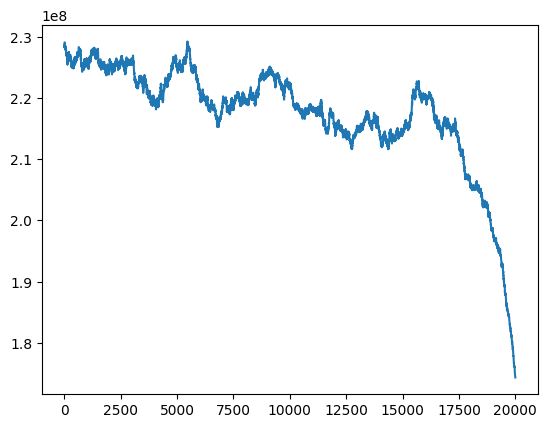

In [358]:
loss_list = anneal_regression.predict_2(X_test)
trash = []

for i in range(len(loss_list)):
  trash.append(mean_squared_error(loss_list[i], y_test))

plt.plot(range(len(loss_list)), trash)

Данный график показывает, насколько быстро сходится метод отжига к истинным весам. Несмотря на то, что при большом количестве итераций функция становится монотонно убывающей (практически), данный метод показывает не такие хорошие результаты, как градиентный спуск, у которого траектория более плавная и монотонно сходящаяся к истинным значениям.

**Вывод:**

И по финальному лоссу, и по траектории метод отжига проигрывает обычному градиентному спуску, так как значение функции ошибки на одинаковых шагах спуска у метода отжига практически всегда больше.